In [1]:
# F1 API Exploration Notebook

# 1. Setup and Configuration
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.pyplot as plt
import pandas as pd

from data_viz import add_image_to_fig, COLORS


import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import requests
from PIL import Image
from io import BytesIO
import os
import pycountry



In [2]:
# Set your API key
API_BASE = "https://v1.formula-1.api-sports.io"
API_KEY = "f35cc03c431fae80097af9025626cdaf"

headers = {
    "x-apisports-key": API_KEY,
    "x-rapidapi-host": "v1.formula-1.api-sports.io"
}

def api_get(endpoint, params=None, debug=False):
    resp = requests.get(f"{API_BASE}/{endpoint}", headers=headers, params=params)
    resp.raise_for_status()
    if debug:
        print(resp.text)
    return resp.json().get("response", [])

# Análisis API

In [ ]:
#endpoint: seasons
seasons = api_get("seasons")
seasons

In [4]:
#En el plan gratuito sólo están disponibles las temporadas de 2021 a 2023
seasons = [2021,2022,2023]
seasons = pd.DataFrame(data=seasons, columns=['season'])
seasons['season'] = pd.Categorical(seasons['season'])

In [7]:
#endpoint: races
season = 2023
races = pd.json_normalize(api_get("races", {"season": season}))
races

,id,season,type,distance,timezone,date,weather,status,competition.id,competition.name,competition.location.country,competition.location.city,circuit.id,circuit.name,circuit.image,laps.current,laps.total,fastest_lap.driver.id,fastest_lap.time
0,1671,2023,Race,308.5 Kms,utc,2023-03-05T15:00:00+00:00,None,Completed,2,Bahrain Grand Prix,Bahrain,Sakhir,2,Bahrain International Circuit,https://media.api-sports.io/formula-1/circuits...,None,57.0,83.0,1:33.996
1,1672,2023,1st Qualifying,None,utc,2023-03-04T15:00:00+00:00,None,Completed,2,Bahrain Grand Prix,Bahrain,Sakhir,2,Bahrain International Circuit,https://media.api-sports.io/formula-1/circuits...,None,NaN,NaN,None
2,1673,2023,3rd Practice,None,utc,2023-03-04T11:30:00+00:00,None,Completed,2,Bahrain Grand Prix,Bahrain,Sakhir,2,Bahrain International Circuit,https://media.api-sports.io/formula-1/circuits...,None,NaN,NaN,None
3,1674,2023,2nd Practice,None,utc,2023-03-03T15:00:00+00:00,None,Completed,2,Bahrain Grand Prix,Bahrain,Sakhir,2,Bahrain International Circuit,https://media.api-sports.io/formula-1/circuits...,None,NaN,NaN,None
4,1675,2023,1st Practice,None,utc,2023-03-03T11:30:00+00:00,None,Completed,2,Bahrain Grand Prix,Bahrain,Sakhir,2,Bahrain International Circuit,https://media.api-sports.io/formula-1/circuits...,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2039,2023,3rd Practice,None,utc,2023-04-15T10:00:00+00:00,None,Cancelled,4,China Grand Prix,China,Anting,4,Shanghai International Circuit,https://media.api-sports.io/formula-1/circuits...,None,NaN,NaN,None
176,2040,2023,1st Qualifying,None,utc,2023-04-15T13:00:00+00:00,None,Cancelled,4,China Grand Prix,China,Anting,4,Shanghai International Circuit,https://media.api-sports.io/formula-1/circuits...,None,NaN,NaN,None
177,2041,2023,2nd Qualifying,None,utc,2023-04-15T13:20:00+00:00,None,Cancelled,4,China Grand Prix,China,Anting,4,Shanghai International Circuit,https://media.api-sports.io/formula-1/circuits...,None,NaN,NaN,None
178,2042,2023,3rd Qualifying,None,utc,2023-04-15T13:40:00+00:00,None,Cancelled,4,China Grand Prix,China,Anting,4,Shanghai International Circuit,https://media.api-sports.io/formula-1/circuits...,None,NaN,NaN,None


In [25]:
races["type"].value_counts()

type
Race                   24
1st Qualifying         24
1st Practice           24
2nd Qualifying         24
3rd Qualifying         24
3rd Practice           18
2nd Practice           18
Sprint                  6
3rd Sprint Shootout     6
2nd Sprint Shootout     6
1st Sprint Shootout     6
Name: count, dtype: int64

In [8]:
#Añadir un filtro de tipo para seleccionar sólo carreras
races = pd.json_normalize(api_get("races", {"season": season, "type":"Race"}))
races

,id,season,type,distance,timezone,date,weather,status,competition.id,competition.name,competition.location.country,competition.location.city,circuit.id,circuit.name,circuit.image,laps.current,laps.total,fastest_lap.driver.id,fastest_lap.time
0,1671,2023,Race,308.5 Kms,utc,2023-03-05T15:00:00+00:00,None,Completed,2,Bahrain Grand Prix,Bahrain,Sakhir,2,Bahrain International Circuit,https://media.api-sports.io/formula-1/circuits...,None,57,83.0,1:33.996
1,1676,2023,Race,308.8 Kms,utc,2023-03-19T17:00:00+00:00,None,Completed,32,Saudi Arabia Grand Prix,Saudi Arabia,Djeddah,29,Jeddah Corniche Circuit,https://media.api-sports.io/formula-1/circuits...,None,50,25.0,1:31.906
2,1681,2023,Race,307.6 Kms,utc,2023-04-02T05:00:00+00:00,None,Completed,1,Australia Grand Prix,Australia,Melbourne,1,Albert Park Circuit,https://media.api-sports.io/formula-1/circuits...,None,58,10.0,1:20.235
3,1686,2023,Race,306.2 Kms,utc,2023-04-30T11:00:00+00:00,None,Completed,8,Azerbaijan Grand Prix,Azerbaijan,Bakou,8,Baku City Circuit,https://media.api-sports.io/formula-1/circuits...,None,51,51.0,1:43.370
4,1691,2023,Race,308.4 Kms,utc,2023-05-07T19:30:00+00:00,None,Completed,34,Miami Grand Prix,USA,Miami,31,Miami International Autodrome,https://media.api-sports.io/formula-1/circuits...,None,57,25.0,1:29.708
5,1696,2023,Race,309.3 Kms,utc,2023-05-21T13:00:00+00:00,None,Cancelled,29,Emilia Romagna Grand Prix,Italy,Imola,27,Autodromo Enzo e Dino Ferrari,https://media.api-sports.io/formula-1/circuits...,None,63,NaN,None
6,1701,2023,Race,260.3 Kms,utc,2023-05-28T13:00:00+00:00,None,Completed,7,Monaco Grand Prix,Monaco,Monte-Carlo,7,Circuit de Monaco,https://media.api-sports.io/formula-1/circuits...,None,78,20.0,1:15.650
7,1706,2023,Race,308.6 Kms,utc,2023-06-04T13:00:00+00:00,None,Completed,6,Spain Grand Prix,Spain,Montmeló,6,Circuit de Barcelona-Catalunya,https://media.api-sports.io/formula-1/circuits...,None,66,25.0,1:16.330
8,1711,2023,Race,305.3 Kms,utc,2023-06-18T18:03:00+00:00,None,Completed,9,Canada Grand Prix,Canada,Montréal,9,Circuit Gilles-Villeneuve,https://media.api-sports.io/formula-1/circuits...,None,70,10.0,1:14.481
9,1716,2023,Race,306.6 Kms,utc,2023-07-02T13:00:00+00:00,None,Completed,11,Austria Grand Prix,Austria,Spielberg,11,Red Bull Ring,https://media.api-sports.io/formula-1/circuits...,None,71,25.0,1:07.012


In [ ]:
#endpoint: rankings/races
#Obtén la clasificación de una carrera.
race_ranking = api_get(f"rankings/races", params={"race":1671})
pd.json_normalize(race_ranking)

,position,time,laps,grid,pits,gap,race.id,driver.id,driver.name,driver.abbr,driver.number,driver.image,team.id,team.name,team.logo
0,1,1:33:56.736,57,1,2,None,1671,25,Max Verstappen,VER,1,https://media.api-sports.io/formula-1/drivers/...,1,Red Bull Racing,https://media.api-sports.io/formula-1/teams/1.png
1,2,+11.987,57,2,2,None,1671,10,Sergio Perez,PER,11,https://media.api-sports.io/formula-1/drivers/...,1,Red Bull Racing,https://media.api-sports.io/formula-1/teams/1.png
2,3,+38.637,57,5,2,None,1671,4,Fernando Alonso,ALO,14,https://media.api-sports.io/formula-1/drivers/...,17,Aston Martin F1 Team,https://media.api-sports.io/formula-1/teams/17...
3,4,+48.052,57,4,2,None,1671,24,Carlos Sainz Jr,SAI,55,https://media.api-sports.io/formula-1/drivers/...,3,Scuderia Ferrari,https://media.api-sports.io/formula-1/teams/3.png
4,5,+50.977,57,7,2,None,1671,20,Lewis Hamilton,HAM,44,https://media.api-sports.io/formula-1/drivers/...,5,Mercedes-AMG Petronas,https://media.api-sports.io/formula-1/teams/5.png
5,6,+54.502,57,8,2,None,1671,31,Lance Stroll,STR,18,https://media.api-sports.io/formula-1/drivers/...,17,Aston Martin F1 Team,https://media.api-sports.io/formula-1/teams/17...
6,7,+55.873,57,6,2,None,1671,51,George Russell,RUS,63,https://media.api-sports.io/formula-1/drivers/...,5,Mercedes-AMG Petronas,https://media.api-sports.io/formula-1/teams/5.png
7,8,+1:12.647,57,12,2,None,1671,5,Valtteri Bottas,BOT,77,https://media.api-sports.io/formula-1/drivers/...,18,Stake F1 Team Kick Sauber,https://media.api-sports.io/formula-1/teams/18...
8,9,+1:13.753,57,20,3,None,1671,36,Pierre Gasly,GAS,10,https://media.api-sports.io/formula-1/drivers/...,13,Alpine F1 Team,https://media.api-sports.io/formula-1/teams/13...
9,10,+1:29.774,57,15,3,None,1671,50,Alexander Albon,ALB,23,https://media.api-sports.io/formula-1/drivers/...,12,Williams F1 Team,https://media.api-sports.io/formula-1/teams/12...


In [ ]:
#endpoint: rankings/teams
#Consigue la clasificación de los equipos durante una temporada.
team_ranking = api_get(f"rankings/teams", params={"season":season})
pd.json_normalize(team_ranking)

,position,points,season,team.id,team.name,team.logo
0,1,860,2023,1,Red Bull Racing,https://media.api-sports.io/formula-1/teams/1.png
1,2,409,2023,5,Mercedes-AMG Petronas,https://media.api-sports.io/formula-1/teams/5.png
2,3,406,2023,3,Scuderia Ferrari,https://media.api-sports.io/formula-1/teams/3.png
3,4,302,2023,2,McLaren Racing,https://media.api-sports.io/formula-1/teams/2.png
4,5,280,2023,17,Aston Martin F1 Team,https://media.api-sports.io/formula-1/teams/17...
5,6,120,2023,13,Alpine F1 Team,https://media.api-sports.io/formula-1/teams/13...
6,7,28,2023,12,Williams F1 Team,https://media.api-sports.io/formula-1/teams/12...
7,8,25,2023,7,Racing Bulls,https://media.api-sports.io/formula-1/teams/7.png
8,9,16,2023,18,Stake F1 Team Kick Sauber,https://media.api-sports.io/formula-1/teams/18...
9,10,12,2023,14,Haas F1 Team,https://media.api-sports.io/formula-1/teams/14...


In [138]:
team_ranking[0]

{'position': 1,
 'team': {'id': 1,
  'name': 'Red Bull Racing',
  'logo': 'https://media.api-sports.io/formula-1/teams/1.png'},
 'points': 860,
 'season': 2023}

In [ ]:
#endpoint: rankings/drivers
#Obtén la clasificación de pilotos de una temporada.
drivers_ranking = api_get(f"rankings/drivers", params={"season":season})
pd.json_normalize(drivers_ranking)

,position,points,wins,behind,season,driver.id,driver.name,driver.abbr,driver.number,driver.image,team.id,team.name,team.logo
0,1,575.0,19,NaN,2023,25,Max Verstappen,VER,1,https://media.api-sports.io/formula-1/drivers/...,1,Red Bull Racing,https://media.api-sports.io/formula-1/teams/1.png
1,2,285.0,2,290.0,2023,10,Sergio Perez,PER,11,https://media.api-sports.io/formula-1/drivers/...,1,Red Bull Racing,https://media.api-sports.io/formula-1/teams/1.png
2,3,234.0,0,341.0,2023,20,Lewis Hamilton,HAM,44,https://media.api-sports.io/formula-1/drivers/...,5,Mercedes-AMG Petronas,https://media.api-sports.io/formula-1/teams/5.png
3,4,206.0,0,369.0,2023,4,Fernando Alonso,ALO,14,https://media.api-sports.io/formula-1/drivers/...,17,Aston Martin F1 Team,https://media.api-sports.io/formula-1/teams/17...
4,5,206.0,0,369.0,2023,34,Charles Leclerc,LEC,16,https://media.api-sports.io/formula-1/drivers/...,3,Scuderia Ferrari,https://media.api-sports.io/formula-1/teams/3.png
5,6,205.0,0,370.0,2023,49,Lando Norris,NOR,4,https://media.api-sports.io/formula-1/drivers/...,2,McLaren Racing,https://media.api-sports.io/formula-1/teams/2.png
6,7,200.0,1,375.0,2023,24,Carlos Sainz Jr,SAI,55,https://media.api-sports.io/formula-1/drivers/...,3,Scuderia Ferrari,https://media.api-sports.io/formula-1/teams/3.png
7,8,175.0,0,400.0,2023,51,George Russell,RUS,63,https://media.api-sports.io/formula-1/drivers/...,5,Mercedes-AMG Petronas,https://media.api-sports.io/formula-1/teams/5.png
8,9,97.0,0,478.0,2023,97,Oscar Piastri,PIA,81,https://media.api-sports.io/formula-1/drivers/...,2,McLaren Racing,https://media.api-sports.io/formula-1/teams/2.png
9,10,74.0,0,501.0,2023,31,Lance Stroll,STR,18,https://media.api-sports.io/formula-1/drivers/...,17,Aston Martin F1 Team,https://media.api-sports.io/formula-1/teams/17...


In [137]:
drivers_ranking[0]

{'position': 1,
 'driver': {'id': 25,
  'name': 'Max Verstappen',
  'abbr': 'VER',
  'number': 1,
  'image': 'https://media.api-sports.io/formula-1/drivers/25.png'},
 'team': {'id': 1,
  'name': 'Red Bull Racing',
  'logo': 'https://media.api-sports.io/formula-1/teams/1.png'},
 'points': 575,
 'wins': 19,
 'behind': None,
 'season': 2023}

In [ ]:
#endpoint: rankings/fastestlaps
#Get the ranking of the fastest laps for a race.
race_fastestlaps_ranking = api_get(f"rankings/fastestlaps", params={"race":1671}, debug=True)
pd.json_normalize(race_fastestlaps_ranking)

{"get":"rankings","parameters":{"race":"1671"},"errors":[],"results":20,"response":[{"race":{"id":1671},"driver":{"id":83,"name":"Guanyu Zhou","abbr":null,"number":24,"image":"https:\/\/media.api-sports.io\/formula-1\/drivers\/83.png"},"team":{"id":18,"name":"Stake F1 Team Kick Sauber","logo":"https:\/\/media.api-sports.io\/formula-1\/teams\/18.png"},"position":1,"lap":56,"time":"1:33.996","avg_speed":"207.276"},{"race":{"id":1671},"driver":{"id":36,"name":"Pierre Gasly","abbr":"GAS","number":10,"image":"https:\/\/media.api-sports.io\/formula-1\/drivers\/36.png"},"team":{"id":13,"name":"Alpine F1 Team","logo":"https:\/\/media.api-sports.io\/formula-1\/teams\/13.png"},"position":2,"lap":42,"time":"1:35.068","avg_speed":"204.939"},{"race":{"id":1671},"driver":{"id":49,"name":"Lando Norris","abbr":"NOR","number":4,"image":"https:\/\/media.api-sports.io\/formula-1\/drivers\/49.png"},"team":{"id":2,"name":"McLaren Racing","logo":"https:\/\/media.api-sports.io\/formula-1\/teams\/2.png"},"pos

,position,lap,time,avg_speed,race.id,driver.id,driver.name,driver.abbr,driver.number,driver.image,team.id,team.name,team.logo
0,1,56,1:33.996,207.276,1671,83,Guanyu Zhou,None,24,https://media.api-sports.io/formula-1/drivers/...,18,Stake F1 Team Kick Sauber,https://media.api-sports.io/formula-1/teams/18...
1,2,42,1:35.068,204.939,1671,36,Pierre Gasly,GAS,10,https://media.api-sports.io/formula-1/drivers/...,13,Alpine F1 Team,https://media.api-sports.io/formula-1/teams/13...
2,3,51,1:35.822,203.327,1671,49,Lando Norris,NOR,4,https://media.api-sports.io/formula-1/drivers/...,2,McLaren Racing,https://media.api-sports.io/formula-1/teams/2.png
3,4,42,1:36.037,202.871,1671,92,Logan Sargeant,None,2,https://media.api-sports.io/formula-1/drivers/...,12,Williams F1 Team,https://media.api-sports.io/formula-1/teams/12...
4,5,36,1:36.156,202.620,1671,4,Fernando Alonso,ALO,14,https://media.api-sports.io/formula-1/drivers/...,17,Aston Martin F1 Team,https://media.api-sports.io/formula-1/teams/17...
5,6,44,1:36.236,202.452,1671,25,Max Verstappen,VER,1,https://media.api-sports.io/formula-1/drivers/...,1,Red Bull Racing,https://media.api-sports.io/formula-1/teams/1.png
6,7,37,1:36.344,202.225,1671,10,Sergio Perez,PER,11,https://media.api-sports.io/formula-1/drivers/...,1,Red Bull Racing,https://media.api-sports.io/formula-1/teams/1.png
7,8,42,1:36.471,201.959,1671,2,Kevin Magnussen,MAG,20,https://media.api-sports.io/formula-1/drivers/...,14,Haas F1 Team,https://media.api-sports.io/formula-1/teams/14...
8,9,32,1:36.546,201.802,1671,31,Lance Stroll,STR,18,https://media.api-sports.io/formula-1/drivers/...,17,Aston Martin F1 Team,https://media.api-sports.io/formula-1/teams/17...
9,10,36,1:36.546,201.802,1671,20,Lewis Hamilton,HAM,44,https://media.api-sports.io/formula-1/drivers/...,5,Mercedes-AMG Petronas,https://media.api-sports.io/formula-1/teams/5.png


In [ ]:
#endpoint: rankings/startinggrid
#Get the starting grid for a race.
race_startinggrid = api_get(f"rankings/startinggrid", params={"race":1671})
pd.json_normalize(race_startinggrid)

{"get":"rankings","parameters":{"race":"1671"},"errors":[],"results":20,"response":[{"race":{"id":1671},"driver":{"id":25,"name":"Max Verstappen","abbr":"VER","number":1,"image":"https:\/\/media.api-sports.io\/formula-1\/drivers\/25.png"},"team":{"id":1,"name":"Red Bull Racing","logo":"https:\/\/media.api-sports.io\/formula-1\/teams\/1.png"},"position":1,"time":"1:29.708"},{"race":{"id":1671},"driver":{"id":10,"name":"Sergio Perez","abbr":"PER","number":11,"image":"https:\/\/media.api-sports.io\/formula-1\/drivers\/10.png"},"team":{"id":1,"name":"Red Bull Racing","logo":"https:\/\/media.api-sports.io\/formula-1\/teams\/1.png"},"position":2,"time":"1:29.846"},{"race":{"id":1671},"driver":{"id":34,"name":"Charles Leclerc","abbr":"LEC","number":16,"image":"https:\/\/media.api-sports.io\/formula-1\/drivers\/34.png"},"team":{"id":3,"name":"Scuderia Ferrari","logo":"https:\/\/media.api-sports.io\/formula-1\/teams\/3.png"},"position":3,"time":"1:30.000"},{"race":{"id":1671},"driver":{"id":24,

,position,time,race.id,driver.id,driver.name,driver.abbr,driver.number,driver.image,team.id,team.name,team.logo
0,1,1:29.708,1671,25,Max Verstappen,VER,1,https://media.api-sports.io/formula-1/drivers/...,1,Red Bull Racing,https://media.api-sports.io/formula-1/teams/1.png
1,2,1:29.846,1671,10,Sergio Perez,PER,11,https://media.api-sports.io/formula-1/drivers/...,1,Red Bull Racing,https://media.api-sports.io/formula-1/teams/1.png
2,3,1:30.000,1671,34,Charles Leclerc,LEC,16,https://media.api-sports.io/formula-1/drivers/...,3,Scuderia Ferrari,https://media.api-sports.io/formula-1/teams/3.png
3,4,1:30.154,1671,24,Carlos Sainz Jr,SAI,55,https://media.api-sports.io/formula-1/drivers/...,3,Scuderia Ferrari,https://media.api-sports.io/formula-1/teams/3.png
4,5,1:30.336,1671,4,Fernando Alonso,ALO,14,https://media.api-sports.io/formula-1/drivers/...,17,Aston Martin F1 Team,https://media.api-sports.io/formula-1/teams/17...
5,6,1:30.340,1671,51,George Russell,RUS,63,https://media.api-sports.io/formula-1/drivers/...,5,Mercedes-AMG Petronas,https://media.api-sports.io/formula-1/teams/5.png
6,7,1:30.384,1671,20,Lewis Hamilton,HAM,44,https://media.api-sports.io/formula-1/drivers/...,5,Mercedes-AMG Petronas,https://media.api-sports.io/formula-1/teams/5.png
7,8,1:30.836,1671,31,Lance Stroll,STR,18,https://media.api-sports.io/formula-1/drivers/...,17,Aston Martin F1 Team,https://media.api-sports.io/formula-1/teams/17...
8,9,1:30.984,1671,28,Esteban Ocon,OCO,31,https://media.api-sports.io/formula-1/drivers/...,13,Alpine F1 Team,https://media.api-sports.io/formula-1/teams/13...
9,10,None,1671,6,Nico Hulkenberg,HUL,27,https://media.api-sports.io/formula-1/drivers/...,14,Haas F1 Team,https://media.api-sports.io/formula-1/teams/14...


In [ ]:
#endpoint: pitstops
#Obtén la lista de pit stops realizadas por todos los pilotos durante una carrera.
race_pitstops = api_get(f"pitstops", params={"race":1671})
pd.json_normalize(race_pitstops)

,stops,lap,time,total_time,race.id,driver.id,driver.name,driver.abbr,driver.number,driver.image,team.id,team.name,team.logo
0,1,9,25.885,25.885,1671,36,Pierre Gasly,GAS,10,https://media.api-sports.io/formula-1/drivers/...,13,Alpine F1 Team,https://media.api-sports.io/formula-1/teams/13...
1,1,10,32.766,32.766,1671,49,Lando Norris,NOR,4,https://media.api-sports.io/formula-1/drivers/...,2,McLaren Racing,https://media.api-sports.io/formula-1/teams/2.png
2,1,10,25.267,25.267,1671,82,Yuki Tsunoda,TSU,22,https://media.api-sports.io/formula-1/drivers/...,7,Racing Bulls,https://media.api-sports.io/formula-1/teams/7.png
3,1,11,25.399,25.399,1671,5,Valtteri Bottas,BOT,77,https://media.api-sports.io/formula-1/drivers/...,18,Stake F1 Team Kick Sauber,https://media.api-sports.io/formula-1/teams/18...
4,1,11,25.054,25.054,1671,50,Alexander Albon,ALB,23,https://media.api-sports.io/formula-1/drivers/...,12,Williams F1 Team,https://media.api-sports.io/formula-1/teams/12...
5,1,11,26.075,26.075,1671,6,Nico Hulkenberg,HUL,27,https://media.api-sports.io/formula-1/drivers/...,14,Haas F1 Team,https://media.api-sports.io/formula-1/teams/14...
6,1,11,25.018,25.018,1671,88,Nyck De Vries,None,17,https://media.api-sports.io/formula-1/drivers/...,7,Racing Bulls,https://media.api-sports.io/formula-1/teams/7.png
7,1,12,24.682,24.682,1671,20,Lewis Hamilton,HAM,44,https://media.api-sports.io/formula-1/drivers/...,5,Mercedes-AMG Petronas,https://media.api-sports.io/formula-1/teams/5.png
8,1,12,24.966,24.966,1671,28,Esteban Ocon,OCO,31,https://media.api-sports.io/formula-1/drivers/...,13,Alpine F1 Team,https://media.api-sports.io/formula-1/teams/13...
9,1,12,25.600,25.600,1671,92,Logan Sargeant,None,2,https://media.api-sports.io/formula-1/drivers/...,12,Williams F1 Team,https://media.api-sports.io/formula-1/teams/12...


In [52]:
#endpoint: competitions
#Obtenga la lista de concursos disponibles.
competitions = api_get(f"competitions")
pd.json_normalize(competitions)

,id,name,location.country,location.city
0,1,Australia Grand Prix,Australia,Melbourne
1,2,Bahrain Grand Prix,Bahrain,Sakhir
2,3,Vietnam Grand Prix,Vietnam,Hanoï
3,4,China Grand Prix,China,Anting
4,5,Netherlands Grand Prix,Netherlands,Zandvoort
5,6,Spain Grand Prix,Spain,Montmeló
6,7,Monaco Grand Prix,Monaco,Monte-Carlo
7,8,Azerbaijan Grand Prix,Azerbaijan,Bakou
8,9,Canada Grand Prix,Canada,Montréal
9,10,France Grand Prix,France,Le Castellet


In [ ]:
#endpoint: circuits
#Obtener la lista de circuitos disponibles.
circuits = api_get(f"circuits")
pd.json_normalize(circuits)

,id,name,image,first_grand_prix,laps,length,race_distance,capacity,opened,owner,competition.id,competition.name,competition.location.country,competition.location.city,lap_record.time,lap_record.driver,lap_record.year
0,1,Albert Park Circuit,https://media.api-sports.io/formula-1/circuits...,1996.0,58.0,5.278 km,306.124 km,80000.0,1953.0,None,1.0,Australia Grand Prix,Australia,Melbourne,1:19.813,Charles Leclerc,2024
1,2,Bahrain International Circuit,https://media.api-sports.io/formula-1/circuits...,2004.0,57.0,5.412 Kms,308.238 kms,70000.0,2004.0,None,2.0,Bahrain Grand Prix,Bahrain,Sakhir,1:31.447,Pedro de la Rosa,2005
2,3,Hanoi Street Circuit,https://media.api-sports.io/formula-1/circuits...,2020.0,55.0,5.607 Kms,308.715 kms,NaN,NaN,None,3.0,Vietnam Grand Prix,Vietnam,Hanoï,None,None,None
3,4,Shanghai International Circuit,https://media.api-sports.io/formula-1/circuits...,2004.0,56.0,5.451 Kms,305.066 kms,200000.0,2004.0,Shanghai Jiushi Group,4.0,China Grand Prix,China,Anting,1:32.238,Michael Schumacher,2004
4,5,Circuit Zandvoort,https://media.api-sports.io/formula-1/circuits...,1952.0,72.0,4.259 kms,306.587 kms,105000.0,1939.0,Chapman Andretti,5.0,Netherlands Grand Prix,Netherlands,Zandvoort,1:11.097,Lewis Hamilton,2021
5,6,Circuit de Barcelona-Catalunya,https://media.api-sports.io/formula-1/circuits...,1991.0,66.0,4.657 km,307.236 km,140700.0,1991.0,None,6.0,Spain Grand Prix,Spain,Montmeló,1:16.330,Max Verstappen,2023
6,7,Circuit de Monaco,https://media.api-sports.io/formula-1/circuits...,1950.0,78.0,3.337 Kms,260.286 kms,37000.0,1950.0,None,7.0,Monaco Grand Prix,Monaco,Monte-Carlo,1:12.909,Lewis Hamilton,2021
7,8,Baku City Circuit,https://media.api-sports.io/formula-1/circuits...,2016.0,51.0,6.003 Kms,306.049 kms,18500.0,NaN,None,8.0,Azerbaijan Grand Prix,Azerbaijan,Bakou,1:43.009,Charles Leclerc,2019
8,9,Circuit Gilles-Villeneuve,https://media.api-sports.io/formula-1/circuits...,1978.0,70.0,4.361 Kms,305.27 kms,100000.0,1978.0,City of Montreal,9.0,Canada Grand Prix,Canada,Montréal,1:13.078,Valtteri Bottas,2019
9,10,Circuit Paul Ricard,https://media.api-sports.io/formula-1/circuits...,1971.0,53.0,5.842 Kms,309.69 kms,90000.0,NaN,None,10.0,France Grand Prix,France,Le Castellet,1:32.740,Sebastian Vettel,2019


In [54]:
#endpoint: teams
#Obtenga la lista de equipos disponibles.
teams = api_get(f"teams")
pd.json_normalize(teams)

,id,name,logo,base,first_team_entry,world_championships,pole_positions,fastest_laps,president,director,technical_manager,chassis,engine,tyres,highest_race_finish.position,highest_race_finish.number
0,1,Red Bull Racing,https://media.api-sports.io/formula-1/teams/1.png,"Milton Keynes, United Kingdom",1997.0,6.0,106.0,100.0,Dietrich Mateschitz,Christian Horner,Pierre Waché,RB21,Honda RBPT,Pirelli,1.0,124.0
1,2,McLaren Racing,https://media.api-sports.io/formula-1/teams/2.png,"Woking, United Kingdom",1966.0,9.0,168.0,177.0,Zak Brown,Andrea Stella,Peter Prodromou / Neil Houldey,MCL39,Mercedes,Pirelli,1.0,194.0
2,3,Scuderia Ferrari,https://media.api-sports.io/formula-1/teams/3.png,"Maranello, Italy",1950.0,16.0,253.0,263.0,John Elkann,Frédéric Vasseur,Loic Serra / Enrico Gualtieri,SF-25,Ferrari,Pirelli,1.0,249.0
3,4,Force India,https://media.api-sports.io/formula-1/teams/4.png,None,NaN,NaN,NaN,NaN,"Subrata Roy, Vijay Mallya",Robert Fernley,Andrew Green,None,"Ferrari V8, Mercedes V8, Mercedes V6 turbo","Bridgestone, Pirelli",NaN,NaN
4,5,Mercedes-AMG Petronas,https://media.api-sports.io/formula-1/teams/5.png,"Brackley, United Kingdom",1970.0,8.0,133.0,101.0,Markus Schäfer,Toto Wolff,James Allison,W16,Mercedes,Pirelli,1.0,120.0
5,6,Lotus F1 Team,https://media.api-sports.io/formula-1/teams/6.png,None,NaN,NaN,NaN,NaN,"Gérard Lopez, Éric Lux,Andrew Ruhan","Éric Boullier, Matthew Carter","James Allison, Nick Chester",None,Mercedes,Pirelli,NaN,NaN
6,7,Racing Bulls,https://media.api-sports.io/formula-1/teams/7.png,"Faenza, Italy",1985.0,0.0,1.0,4.0,Dietrich Mateschitz,Laurent Mekies,Tim Goss,VCARB 02,Honda RBPT,Pirelli,1.0,2.0
7,8,Sauber F1 Team,https://media.api-sports.io/formula-1/teams/8.png,None,NaN,NaN,NaN,NaN,Pascal Picci,Frédéric Vasseur,Simone Resta,None,Ferrari V6 turbo Type 062 EVO,Pirelli,NaN,NaN
8,9,Manor Marussia F1 Team,https://media.api-sports.io/formula-1/teams/9.png,None,NaN,NaN,NaN,NaN,Stephen Fitzpatrick,Abdulla Boulsien,John McQuilliam,None,"Cosworth, Ferrari",Pirelli,NaN,NaN
9,10,Caterham F1 Team,https://media.api-sports.io/formula-1/teams/10...,None,NaN,NaN,NaN,NaN,"Tony Fernandes, Graham Macdonald, Colin Kolles...","Riad Asmat, Steve Nielsen, Cyril Abiteboul, Ch...","Mike Gascoyne, Mark Smith, John Iley",None,Renault,Pirelli,NaN,NaN


In [59]:
#endpoint: drivers
#Obtener la lista de pilotas disponibles.
api_get(f"drivers", debug=True)

{"get":"drivers","parameters":[],"errors":{"parameter":"This endpoint require at least one parameter"},"results":0,"response":[]}


[]

In [ ]:
#Parámetros disponibles
#id: El id del pilota
#name: El nombre del pilota
#search: Permitir buscar el nombre de un pilota
api_get(f"drivers", params={"search":"lewi"})

[{'id': 20,
  'name': 'Lewis Hamilton',
  'abbr': 'HAM',
  'image': 'https://media.api-sports.io/formula-1/drivers/20.png',
  'nationality': 'British',
  'country': {'name': 'United Kingdom', 'code': 'GB'},
  'birthdate': '1985-01-07',
  'birthplace': 'Stevenage, England',
  'number': 44,
  'grands_prix_entered': 363,
  'world_championships': 7,
  'podiums': 202,
  'highest_race_finish': {'position': 1, 'number': 105},
  'highest_grid_position': 1,
  'career_points': '4915.5',
  'teams': [{'season': 2025,
    'team': {'id': 3,
     'name': 'Scuderia Ferrari',
     'logo': 'https://media.api-sports.io/formula-1/teams/3.png'}},
   {'season': 2024,
    'team': {'id': 5,
     'name': 'Mercedes-AMG Petronas',
     'logo': 'https://media.api-sports.io/formula-1/teams/5.png'}},
   {'season': 2023,
    'team': {'id': 5,
     'name': 'Mercedes-AMG Petronas',
     'logo': 'https://media.api-sports.io/formula-1/teams/5.png'}},
   {'season': 2022,
    'team': {'id': 5,
     'name': 'Mercedes-AMG P

# Visualizaciones

## Circuits

In [ ]:
circuits = pd.json_normalize(api_get(endpoint="circuits"))

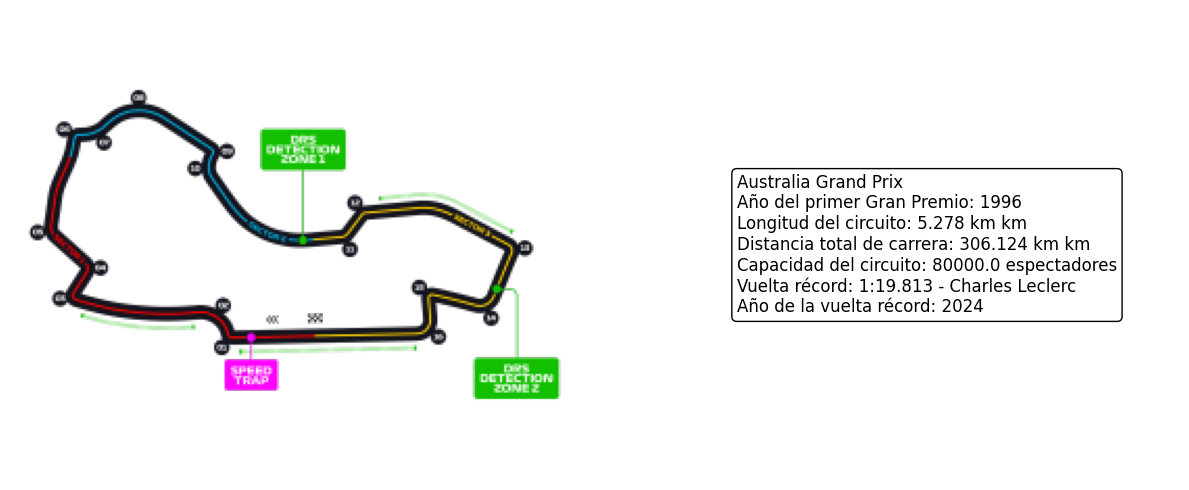

In [ ]:
circuit_name = "Albert Park Circuit"
row = circuits[circuits["name"] == circuit_name].iloc[0]


image_url = row['image']


fig, ax = plt.subplots(figsize=(12, 5))
add_image_to_fig(
    fig, image_url, 
    0, 0.5, width=1.5, 
    height=1.5, background=False, xycoords='axes fraction'
)
ax.axis('off')

info_text = (
    f"{row['competition.name']}\n"
    f"Año del primer Gran Premio: {int(row['first_grand_prix'])}\n"
    f"Longitud del circuito: {row['length']} km\n"
    f"Distancia total de carrera: {row['race_distance']} km\n"
    f"Capacidad del circuito: {row['capacity']} espectadores\n"
    f"Vuelta récord: {row['lap_record.time']} - {row['lap_record.driver']}\n"
    f"Año de la vuelta récord: {int(row['lap_record.year']) if pd.notna(row['lap_record.year']) else 'N/D'}"
)

plt.text(
    0.5, 0.5, info_text,
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='center',
    bbox=dict(boxstyle="round", facecolor='white', edgecolor='black')
)

plt.tight_layout()
plt.show()



In [ ]:



def get_country_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_2.lower()
    except LookupError:
        print(f"⚠️ Not Found: {country_name}")
        return None

def get_country_url(country_code):
    url = f"https://flagcdn.com/w80/{country_code}.png"
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            return url
    except:
        pass
    return False

def plot_lollipop_with_flags(circuits, n=10):
    # Ordina per lunghezza
    top_circuits = circuits.sort_values(by="length", ascending=True).tail(n)

    # Dati
    names = top_circuits["name"]
    lengths = top_circuits["length"].apply(lambda x : int(x.split(' ')[0].replace('.','')))
    countries = top_circuits["competition.location.country"]

    min_x = lengths.iloc[0]

    # Crea cartella flags se non esiste
    os.makedirs("flags", exist_ok=True)

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, (name, length, country) in enumerate(zip(names, lengths, countries)):
        y = i
        # Linea da 0 alla lunghezza
        ax.plot([min_x*0.75, length], [y, y], color='gray', linewidth=2)

        # Cerchio alla fine (bianco per contenere la bandiera)
        circle = ax.scatter(x=length, y=y, s=500, color=COLORS['oro_sd'], zorder=3)
        
        # Ottieni codice ISO e percorso
        code = get_country_code(country)

        # Scarica se non esiste
        if code:
            img_url = get_country_url(code)
            if img_url:
                add_image_to_fig(fig, img_url= img_url, x=length, y=y, xycoords='data', width=0.25)

    # Etichette asse y
    ax.set_yticks(range(len(names)))
    ax.set_yticklabels(names)

    ax.set_xlabel("Longitud del circuito (km)")
    ax.set_title("Circuitos más largos")
    plt.tight_layout()
    plt.show()


⚠️ Paese non trovato: None
⚠️ Paese non trovato: Russia


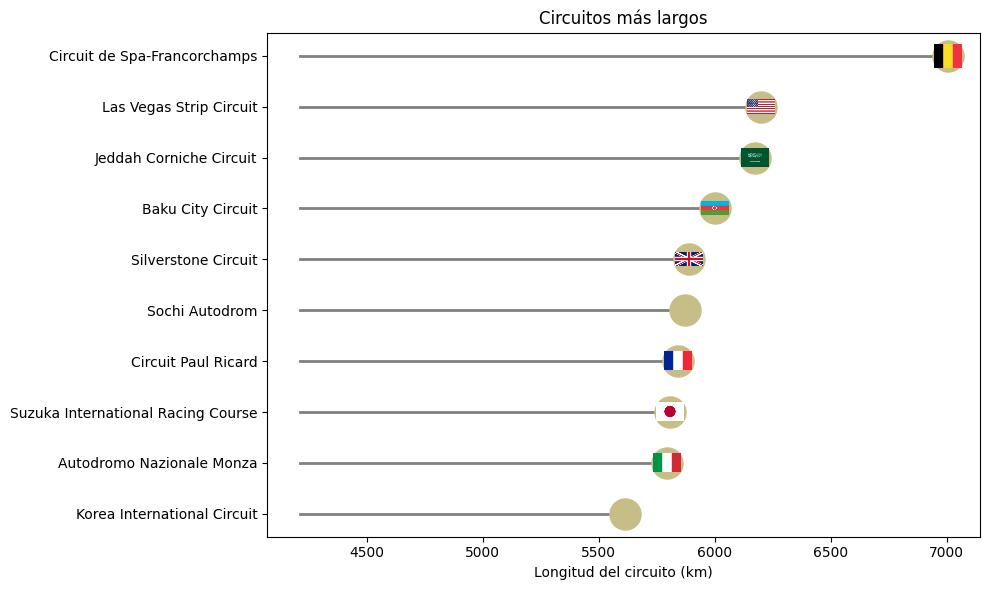

In [136]:
plot_lollipop_with_flags(circuits)

## TOP 10

In [148]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from data_viz import get_font_manager
from highlight_text import ax_text

def create_top10_table_image_f1(
    table_df,
    metric_name="points",
    metric_visible_name="Punti",
    image_column="imageDataURL",
    name_column="name",
    team_column="team_name",
    selected_id=None,
    id_column=None,
    team_logo_column=None,
    img_width=0.35
):
    fig, ax = plt.subplots(figsize=(7, 12))
    ax.axis("off")
    renderer = ax.figure.canvas.get_renderer()
    font_prop = get_font_manager(font_name="Relaway", font_weight="regular").prop
    font_prop_bold = get_font_manager(font_name="Relaway", font_weight="bold").prop

    widths = []
    for i, (_, record) in enumerate(table_df.iterrows()):
        y_pos = len(table_df) - i

        # Rank
        ax.text(
            x=0.1,
            y=y_pos,
            s=f"{record['rank']}°",
            ha="center",
            va="center",
            fontproperties=font_prop_bold,
            size=14,
            color=COLORS["grigio_sd"],
        )

        # Main image (driver/team)
        add_image_to_fig(
            fig=fig,
            img_url=record[image_column],
            x=1,
            y=y_pos,
            xycoords="data",
            width=img_width,
        )

        # Optional team logo
        if team_logo_column and pd.notna(record.get(team_logo_column)):
            add_image_to_fig(
                fig=fig,
                img_url=record[team_logo_column],
                x=2,
                y=y_pos,
                xycoords="data",
                width=0.3,
            )

        # Name
        name_text = ax.text(
            x=3,
            y=y_pos + 0.1,
            s=record[name_column],
            ha="left",
            va="center",
            fontproperties=font_prop_bold,
            size=16,
            color=COLORS["oro_sd"],
        )
        widths.append(name_text.get_window_extent(renderer=renderer).width)

        # Team name (if available)
        if team_column in record:
            team_text = ax.text(
                x=3,
                y=y_pos - 0.1,
                s=record[team_column],
                ha="left",
                va="top",
                fontproperties=font_prop,
                size=12,
                color=COLORS["grigio_sd"],
            )
            widths.append(team_text.get_window_extent(renderer=renderer).width)

    max_width_data = max(widths) / ax.figure.dpi * 2.54
    value_x = int(3 + max_width_data)
    xmin, xmax = (-0.5, value_x + 1)

    # Linea iniziale
    ax.plot(
        [-0.5, value_x + 1],
        [len(table_df) + 1 - 0.5, len(table_df) + 1 - 0.5],
        color=COLORS["oro_sd"],
    )

    for i, (_, record) in enumerate(table_df.iterrows()):
        y_pos = len(table_df) - i
        val = record[metric_name] if isinstance(record[metric_name], int) else round(record[metric_name], 2)

        ax.text(
            x=value_x,
            y=y_pos,
            s=val,
            ha="left",
            va="center",
            fontproperties=font_prop_bold,
            size=15,
            color=COLORS["grigio_sd"],
        )

        # Background color
        is_selected = selected_id is not None and record.get(id_column) == selected_id
        patch_color = COLORS["oro_sd"] if is_selected else ("white" if i % 2 == 0 else "lightgray")

        ax.add_patch(
            Rectangle(
                xy=(-0.5, y_pos - 0.5),
                width=value_x + 1.5,
                height=1,
                zorder=-1,
                color=patch_color,
                alpha=0.2,
            )
        )

        ax.plot(
            [xmin, xmax],
            [y_pos - 0.5, y_pos - 0.5],
            color=COLORS["oro_sd"],
        )

    ax.set_ylim(top=len(table_df) + 1)
    ax.set_xlim((xmin, xmax))

    ax_text(
        x=(xmax + xmin) / 2,
        y=len(table_df) + 1,
        s=f"<Top 10 {metric_visible_name}>",
        color="black",
        highlight_textprops=[
            {"fontsize": 20, "color": COLORS["oro_sd"]},
        ],
        ax=ax,
        fontproperties=font_prop,
        ha="center",
        va="center",
        textalign="center",
    )

    plt.tight_layout()
    return fig


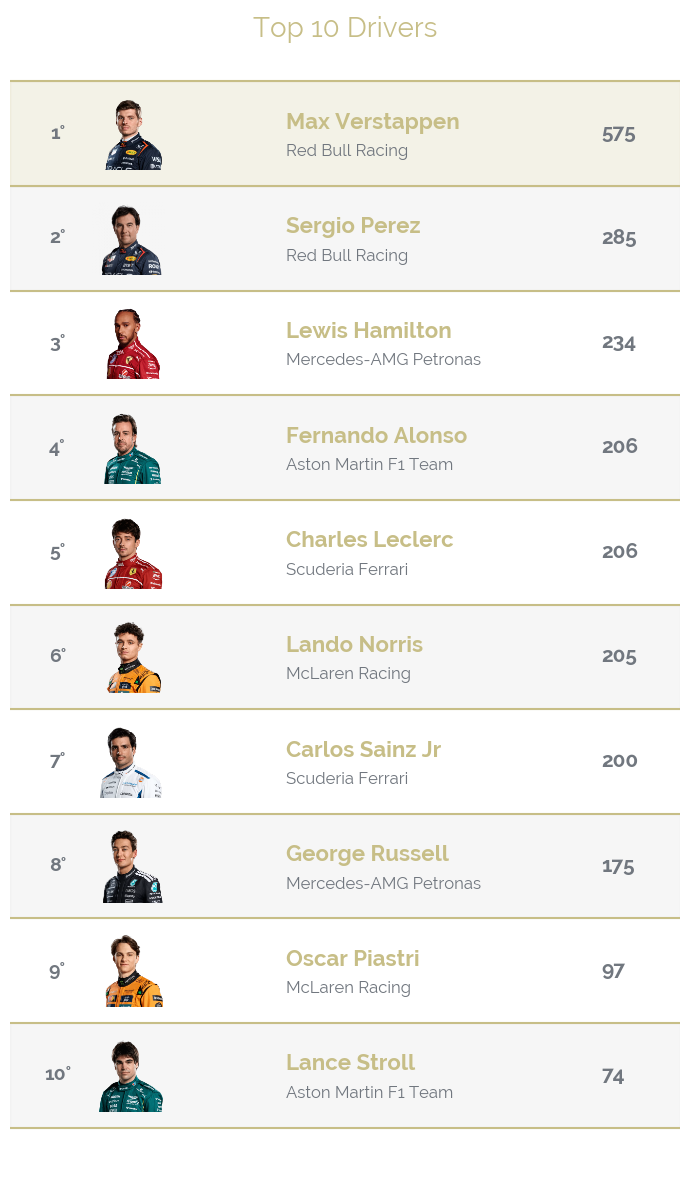

In [149]:
drivers = api_get("rankings/drivers", {"season": season})[:10]

df_drivers = pd.DataFrame([
    {
        "rank": d["position"],
        "name": d["driver"]["name"],
        "imageDataURL": d["driver"]["image"],
        "team_name": d["team"]["name"],
        "team_logo": d["team"]["logo"],
        "points": d["points"],
        "driver_id": d["driver"]["id"],
    }
    for d in drivers
])

fig = create_top10_table_image_f1(
    df_drivers,
    selected_id=25,
    id_column="driver_id",
    metric_visible_name="Drivers",
    img_width=0.35
)

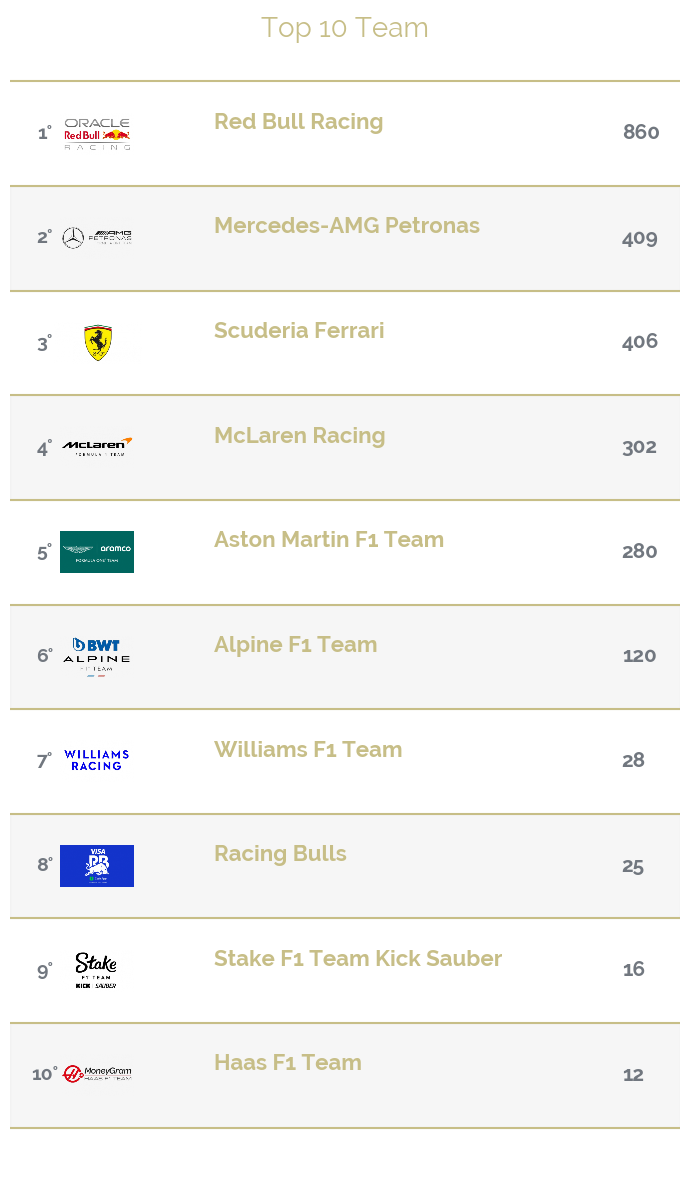

In [151]:
teams = api_get("rankings/teams", {"season": season})[:10]

df_teams = pd.DataFrame([
    {
        "rank": t["position"],
        "name": t["team"]["name"],
        "imageDataURL": t["team"]["logo"],
        "points": t["points"],
        "team_id": t["team"]["id"],
    }
    for t in teams
])

fig = create_top10_table_image_f1(
    df_teams,
    selected_id=None,
    id_column="team_id",
    metric_visible_name="Team",
    img_width=0.2
)

## Super Time

Analizando los "Super Time" podemos ver el rendimiento de cada piloto (o equipo). La normalización con respecto al mejor tiempo de la carrera nos permite analizar el rendimiento independientemente de la longitud del circuito

In [9]:
races

,id,season,type,distance,timezone,date,weather,status,competition.id,competition.name,competition.location.country,competition.location.city,circuit.id,circuit.name,circuit.image,laps.current,laps.total,fastest_lap.driver.id,fastest_lap.time
0,1671,2023,Race,308.5 Kms,utc,2023-03-05T15:00:00+00:00,None,Completed,2,Bahrain Grand Prix,Bahrain,Sakhir,2,Bahrain International Circuit,https://media.api-sports.io/formula-1/circuits...,None,57,83.0,1:33.996
1,1676,2023,Race,308.8 Kms,utc,2023-03-19T17:00:00+00:00,None,Completed,32,Saudi Arabia Grand Prix,Saudi Arabia,Djeddah,29,Jeddah Corniche Circuit,https://media.api-sports.io/formula-1/circuits...,None,50,25.0,1:31.906
2,1681,2023,Race,307.6 Kms,utc,2023-04-02T05:00:00+00:00,None,Completed,1,Australia Grand Prix,Australia,Melbourne,1,Albert Park Circuit,https://media.api-sports.io/formula-1/circuits...,None,58,10.0,1:20.235
3,1686,2023,Race,306.2 Kms,utc,2023-04-30T11:00:00+00:00,None,Completed,8,Azerbaijan Grand Prix,Azerbaijan,Bakou,8,Baku City Circuit,https://media.api-sports.io/formula-1/circuits...,None,51,51.0,1:43.370
4,1691,2023,Race,308.4 Kms,utc,2023-05-07T19:30:00+00:00,None,Completed,34,Miami Grand Prix,USA,Miami,31,Miami International Autodrome,https://media.api-sports.io/formula-1/circuits...,None,57,25.0,1:29.708
5,1696,2023,Race,309.3 Kms,utc,2023-05-21T13:00:00+00:00,None,Cancelled,29,Emilia Romagna Grand Prix,Italy,Imola,27,Autodromo Enzo e Dino Ferrari,https://media.api-sports.io/formula-1/circuits...,None,63,NaN,None
6,1701,2023,Race,260.3 Kms,utc,2023-05-28T13:00:00+00:00,None,Completed,7,Monaco Grand Prix,Monaco,Monte-Carlo,7,Circuit de Monaco,https://media.api-sports.io/formula-1/circuits...,None,78,20.0,1:15.650
7,1706,2023,Race,308.6 Kms,utc,2023-06-04T13:00:00+00:00,None,Completed,6,Spain Grand Prix,Spain,Montmeló,6,Circuit de Barcelona-Catalunya,https://media.api-sports.io/formula-1/circuits...,None,66,25.0,1:16.330
8,1711,2023,Race,305.3 Kms,utc,2023-06-18T18:03:00+00:00,None,Completed,9,Canada Grand Prix,Canada,Montréal,9,Circuit Gilles-Villeneuve,https://media.api-sports.io/formula-1/circuits...,None,70,10.0,1:14.481
9,1716,2023,Race,306.6 Kms,utc,2023-07-02T13:00:00+00:00,None,Completed,11,Austria Grand Prix,Austria,Spielberg,11,Red Bull Ring,https://media.api-sports.io/formula-1/circuits...,None,71,25.0,1:07.012


In [86]:
import time

def get_super_times_by_season(season: int) -> dict:
    """
    Calcola i Super Time per tutte le gare di una stagione.
    Rispetta il rate limit di 10 richieste al minuto.
    
    Restituisce:
        - races (DataFrame con le gare)
        - super_times (dict con i tempi e info per ogni gara)
    """
    super_times = {}
    
    races = pd.json_normalize(api_get("races", {"season": season, "type": "Race"}, debug=True))
    
    for i, (_, race) in enumerate(races.iterrows()):
        race_id = race["id"]
        race_name = race["competition.name"] + " - " + race["circuit.name"]
        
        try:
            best_laps = api_get("rankings/fastestlaps", {"race": race_id})
        except Exception as e:
            print(f"Errore nella richiesta per race {race_id}: {e}")
            continue
        
        # Delay tra richieste per rispettare il limite
        time.sleep(6.5)  # ≈ 9 richieste al minuto = sicuro
        
        best_laps_df = pd.json_normalize(best_laps)
        
        if not best_laps_df.empty:
            best_laps_df["time_ms"] = best_laps_df["time"].apply(time_to_ms)
            best_laps_df["superTimeRatio"] = best_laps_df["time_ms"] / best_laps_df["time_ms"].min()
            best_laps_df["superTimeDelta"] = best_laps_df["superTimeRatio"] - 1
            best_laps_df["superTimeDelta%"] = (best_laps_df["superTimeDelta"] * 100).round(2)

            super_times[race_id] = {
                "race_name": race_name,
                "data": best_laps_df
            }

    return races, super_times

In [87]:
def build_super_time_dataframe(season: int, by: str = "driver"):
    """
    Crea un DataFrame completo per visualizzazione scatter-line.
    
    Args:
        season: stagione selezionata
        by: "driver" o "team"

    Returns:
        pd.DataFrame con colonne standardizzate:
            race_index, race_name, entity_name, image_url, time, time_ms, superTimeRatio, superTimeDelta%
    """
    assert by in ["driver", "team"], "Valore 'by' deve essere 'driver' o 'team'"

    races, super_times = get_super_times_by_season(season)
    all_rows = []
    
    # Ottieni i dati delle gare per associare i nomi
    race_name_map = dict(zip(races["id"], races["competition.name"]))
    
    for race_index, (race_id, data) in enumerate(super_times.items(), start=1):
        df = data["data"]
        race_name = race_name_map.get(race_id, f"GP {race_index}")
        
        for _, row in df.iterrows():
            if by == "driver":
                name = row["driver.name"]
                image = row["driver.image"]
            else:
                name = row["team.name"]
                image = row["team.logo"]

            all_rows.append({
                "race_index": race_index,
                "race_name": race_name,
                "entity_name": name,
                "image_url": image,
                "time": row["time"],
                "time_ms": row["time_ms"],
                "superTimeRatio": row["superTimeRatio"],
                "superTimeDelta%": row["superTimeDelta%"],
            })

    return pd.DataFrame(all_rows)


In [ ]:
df = build_super_time_dataframe(season=2023)

In [92]:
import plotly.express as px
import plotly.graph_objects as go

def plot_super_time(df: pd.DataFrame, by: str = "driver"):
    """
    Crea il grafico scatter-line per Super Time.
    """
    fig = go.Figure()
    
    for name, group in df.groupby("entity_name"):
        fig.add_trace(go.Scatter(
            x=group["race_index"],
            y=(group["superTimeRatio"] * 100),  # da 100%
            mode="lines+markers",
            name=name,
            text=[  # Tooltip personalizzato
                f"""
                <b>{row["entity_name"]}</b><br>
                <b>GP:</b> {row['race_name']}<br>
                <b>Best Lap:</b> {row['time']}<br>
                <b>Delta%:</b> {row['superTimeDelta%']}%
                """ for _, row in group.iterrows()
            ],
            hoverinfo="text"
        ))

    fig.update_layout(
        title=f"Super Time Ratio - {'Drivers' if by == 'driver' else 'Teams'}",
        xaxis_title="GP",
        yaxis_title="Super Time % (100 = best)",
        yaxis=dict(range=[100, df["superTimeRatio"].max() * 105]),  # per un po’ di margine
        hovermode="closest",
        template="plotly_white",
        height=600
    )
    
    return fig


In [91]:
plot_super_time(df=df)